# Student GPA Predictions using Linear Regression

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.shape

(2392, 15)

In [7]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [16]:
df = df.drop_duplicates()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


There is no categorical column , so we dont need any Encoding

But we need to Standardize the data, beacuse some data in 0/1 and some are decimal, some are in 10~20

For that we would use **Standardscaler()**

In [22]:
from sklearn.preprocessing import StandardScaler

**but before that lets do some visualization**

In [23]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='GPA', ylabel='Count'>

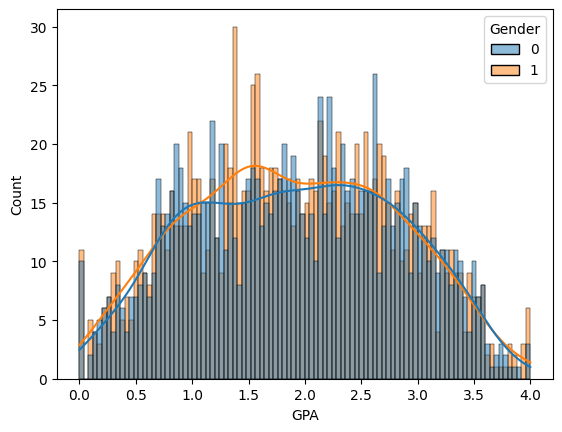

In [35]:
sns.histplot(x = 'GPA', data = df, bins = 100, kde=  True, hue = 'Gender')

<Axes: xlabel='Gender'>

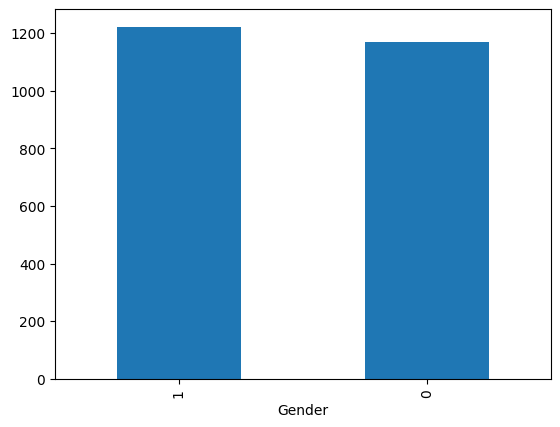

In [40]:
df['Gender'].value_counts().plot(kind= 'bar')

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score,roc_curve

In [45]:
# features , target segregation

x = df.drop('GPA', axis = 1)
y = df['GPA']

In [46]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [57]:
x_train.shape, x_test.shape

((1913, 14), (479, 14))

In [58]:
# Standardization

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [59]:
x_train

array([[-0.80408413,  1.37285117,  0.97165101, ..., -0.49705784,
        -0.43041146,  0.82018081],
       [ 0.81094452, -0.40585814,  0.97165101, ..., -0.49705784,
         2.3233582 ,  0.82018081],
       [ 0.30024627,  0.48349652, -1.0291761 , ..., -0.49705784,
        -0.43041146,  0.82018081],
       ...,
       [-0.09405352, -0.40585814,  0.97165101, ..., -0.49705784,
        -0.43041146,  0.01141489],
       [ 0.14456333,  1.37285117, -1.0291761 , ..., -0.49705784,
        -0.43041146,  0.82018081],
       [-0.48689832,  1.37285117, -1.0291761 , ..., -0.49705784,
        -0.43041146,  0.82018081]])

In [60]:
y_train

642     1.396278
1752    0.754751
1401    0.136166
2032    1.172192
990     1.747356
          ...   
1638    1.595627
1095    1.523945
1130    2.051919
1294    1.348997
860     0.012063
Name: GPA, Length: 1913, dtype: float64

Training the model with training data

In [61]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
lr.score(x_train, y_train)

0.9570153078510912

In [63]:
lr.score(x_test, y_test)

0.955667477854411

In [67]:
y_pred = lr.predict(x_test)

In [75]:
y_test = np.array(y_test)

In [76]:
y_pred

array([1.41612928, 2.94843161, 1.81913105, 3.59535925, 0.24247914,
       2.69472313, 1.61470905, 2.2672402 , 2.09022099, 0.98504691,
       2.56378946, 0.60116482, 3.07795012, 2.71490772, 2.84269975,
       0.31114394, 1.0339629 , 1.46347338, 1.97617852, 2.61662306,
       2.1799161 , 1.55768749, 1.64347252, 3.33215932, 1.73134015,
       0.56055352, 1.63335989, 2.56373534, 1.99306459, 1.79196231,
       1.90276943, 0.69406032, 2.99621643, 3.20742988, 1.39077977,
       1.81220406, 3.18420946, 2.97187925, 3.25608425, 0.72762981,
       2.71297071, 3.50886221, 1.12054492, 2.19325319, 0.88828263,
       2.56049621, 2.97084975, 1.04515486, 2.89917559, 1.51050823,
       3.13596755, 3.10045844, 1.51338767, 1.12615125, 1.69743789,
       3.48016467, 2.52989684, 3.35102749, 0.98887204, 2.06295687,
       1.6671709 , 1.84313225, 2.29183865, 1.43140807, 1.07799568,
       2.18547873, 3.27238338, 2.55877953, 1.07805128, 3.49636564,
       3.5519369 , 0.87709973, 2.97235272, 2.70359984, 0.81822

In [90]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean squared error: ', mse)
print('R2 score ',r2 )
print('RMSE: ', mse**0.5)

Mean squared error:  0.036660008424457734
R2 score  0.955667477854411
RMSE:  0.19146803499398465


R2 score is too high , might show overfitting

In [88]:
lr.coef_

array([ 4.28893847e-03, -6.19579570e-03,  6.56267881e-03,  3.67900883e-03,
        1.09934075e-03,  1.55887101e-01, -7.90118087e-01,  1.11083885e-01,
        1.55760722e-01,  8.64183209e-02,  8.17095121e-02,  5.84487750e-02,
        8.72413498e-05, -7.45328074e-02])

In [87]:
lr.intercept_

1.9011193566234508

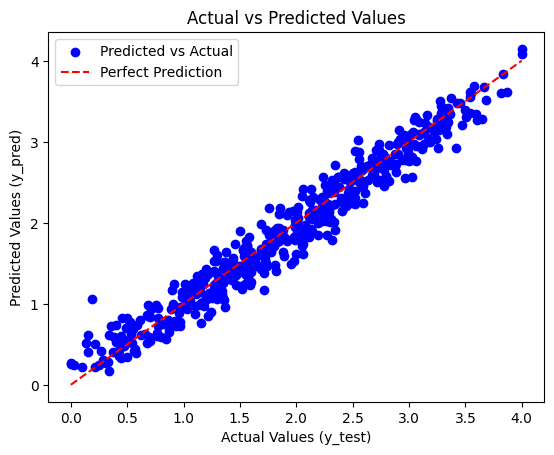

In [91]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plotting a diagonal line to represent the perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()